# OpenCV vs Kornia (CPU vs GPU) Computer Vision Benchmarks
This notebook investigates the performance improvements between the OpenCV and Kornia libraries. Kornia is a library that relies on GPU in order to accelerate differntiable computer vision tasks. In the backend, it uses Pytorch and represents computer vision tasks as computational graphs to accelerate them on GPUs.

##  Local Development Hardware:
**CPU:** Intel Core i9-11700K <br>
**GPU:** NVIDIA Geforce RTX 3090 <br>

<a target="_blank" href="https://colab.research.google.com/github/dotimothy/AccelerationMethods/blob/main/OpenCVvsKornia.ipynb">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>  

## Dependencies

In [2]:
# CoLab Check. If In CoLab then install some dependencies.
IN_COLAB = True
try:
  import google.colab
except:
  IN_COLAB = False
  print(f'In CoLab: {IN_COLAB}')

In CoLab: False


In [3]:
if(IN_COLAB):
    !curl -O https://raw.githubusercontent.com/dotimothy/AccelerationMethods/main/requirements.txt 
!pip install -r requirements.txt


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [107]:
## Dependencies
import os
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import kornia as K
import torch
import time
from tqdm import tqdm

In [5]:
# Determine the PyTorch Accelerator 
use_cuda = torch.cuda.is_available()
use_mps = torch.backends.mps.is_available()
device = torch.device('cuda' if use_cuda else 'mps' if use_mps else 'cpu')
print(f'Torch Device: {device}')

Torch Device: cuda


## Downloading Test Image & Visualizing It

In [8]:
# Creating the Data Directory
dataDir = './data'
os.makedirs(dataDir,exist_ok=True)

In [18]:
# Downloading Test Image
imgLink = 'http://www.lenna.org/lena_std.tif'
imgPath = f'{dataDir}/lena_std.tif'
if(not(os.path.exists(imgPath))):
    os.system(f'curl {imgLink} -o {imgPath}')

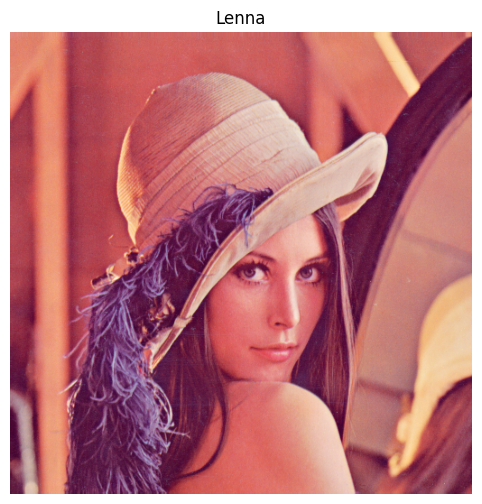

In [140]:
lenna = cv.imread(imgPath)[...,::-1]
lennaTensor = torch.tensor(lenna.transpose(2,1,0)[np.newaxis,...].astype(np.float32).copy()).to(device)
plt.figure(figsize=(9,6))
plt.imshow(lenna)
plt.title('Lenna')
plt.axis('off')
plt.show()

## Experiments

### Box Blur

In [126]:
# Blur
kernelSize = (7,7)

# OpenCV
blurCV = cv.blur(lenna,kernelSize)
blurKornia = torch.max(K.filters.box_blur(lennaTensor,kernelSize),dim=0)[0].permute(2,1,0).to(torch.uint8).cpu().numpy()

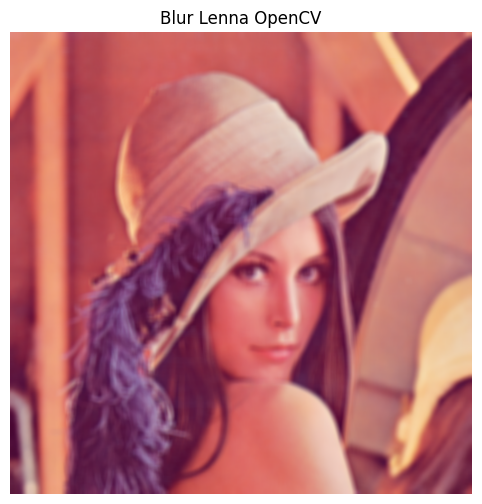

In [139]:
plt.figure(figsize=(9,6))
plt.imshow(blurCV)
plt.title('Blur Lenna OpenCV')
plt.axis('off')
plt.show()

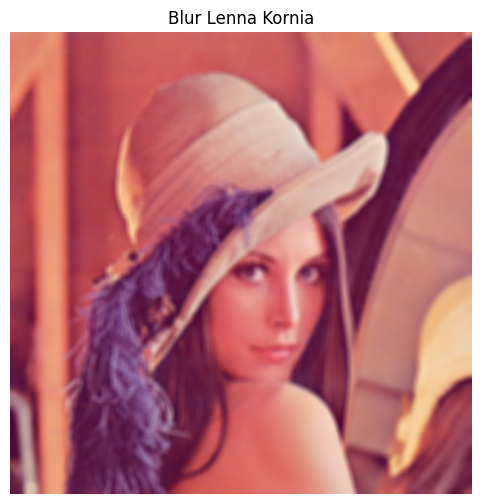

In [137]:
plt.figure(figsize=(9,6))
plt.imshow(blurKornia)
plt.title('Blur Lenna Kornia')
plt.axis('off')
plt.show()

In [129]:
# Performance Benchmarks
iter = 2500

# Blur OpenCV 
print('Blur OpenCV')
start = time.time()
for _ in tqdm(range(iter)):
    blurCV = cv.filter2D(lenna,-1,kernel)
end = time.time()
avgBlurCV = (end-start)/iter
print(f'Average OpenCV Runtime: {1000*avgBlurCV:.2f} ms')

# Blur Kornia
print('Blur Kornia')
start = time.time()
for _ in tqdm(range(iter)):
    blurKornia = torch.max(K.filters.box_blur(lennaTensor,kernelSize),dim=0)[0].permute(2,1,0).to(torch.uint8).cpu().numpy()
end = time.time()
avgBlurKornia = (end-start)/iter
print(f'Average Kornia Runtime: {1000*avgBlurKornia:.2f} ms')

print(f'Blur Speedup: {(avgBlurCV/avgBlurKornia):.2f}')

Blur OpenCV


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2500/2500 [00:07<00:00, 339.78it/s]


Average OpenCV Runtime: 2.94 ms
Blur Kornia


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2500/2500 [00:01<00:00, 1918.23it/s]

Average Kornia Runtime: 0.52 ms
Blur Speedup: 5.64


### Resize

In [147]:
# Resize 
sz = (1024,1024)

# OpenCV Resize
resizedCV = cv.resize(lenna,sz)
resizedKornia = torch.max(K.geometry.transform.resize(lennaTensor,sz),dim=0)[0].permute(2,1,0).to(torch.uint8).cpu().numpy()

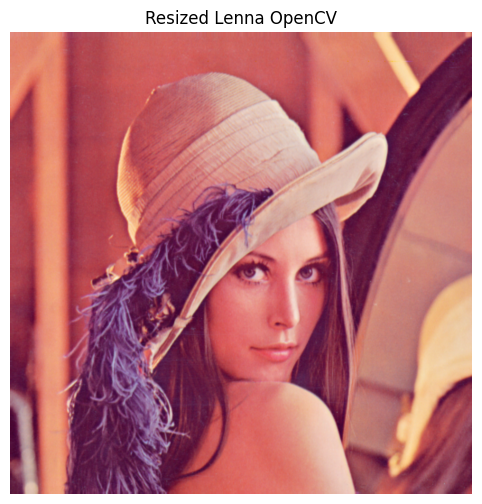

In [148]:
plt.figure(figsize=(9,6))
plt.imshow(resizedCV)
plt.title('Resized Lenna OpenCV')
plt.axis('off')
plt.show()

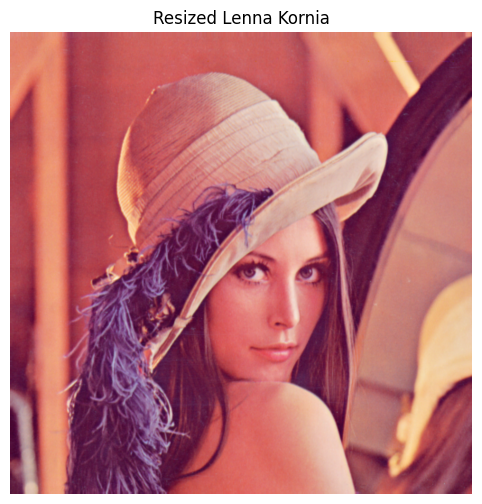

In [149]:
plt.figure(figsize=(9,6))
plt.imshow(resizedKornia)
plt.title('Resized Lenna Kornia')
plt.axis('off')
plt.show()

In [150]:
# Performance Benchmarks
iter = 2500

# Blur OpenCV 
print('Resize OpenCV')
start = time.time()
for _ in tqdm(range(iter)):
    resizedCV = cv.resize(lenna,sz)
end = time.time()
avgBlurCV = (end-start)/iter
print(f'Average OpenCV Runtime: {1000*avgBlurCV:.2f} ms')

# Blur Kornia
print('Resize Kornia')
start = time.time()
for _ in tqdm(range(iter)):
    resizedKornia = torch.max(K.geometry.transform.resize(lennaTensor,sz),dim=0)[0].permute(2,1,0).to(torch.uint8).cpu().numpy()
end = time.time()
avgBlurKornia = (end-start)/iter
print(f'Average Kornia Runtime: {1000*avgBlurKornia:.2f} ms')

print(f'Resize Speedup: {(avgBlurCV/avgBlurKornia):.2f}')

Resize OpenCV


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2500/2500 [00:03<00:00, 753.60it/s]


Average OpenCV Runtime: 1.33 ms
Resize Kornia


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2500/2500 [00:01<00:00, 1366.74it/s]

Average Kornia Runtime: 0.73 ms
Resize Speedup: 1.81


### Image Registration

In [210]:
def register_images(img1, img2):
    # Convert images to grayscale
    img1_gray = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
    img2_gray = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

    # Detect and describe features
    orb = cv.ORB_create()
    kp1, des1 = orb.detectAndCompute(img1_gray, None)
    kp2, des2 = orb.detectAndCompute(img2_gray, None)

    # Match features
    matcher = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
    matches = matcher.match(des1, des2)

    # Sort matches by distance
    matches = sorted(matches, key=lambda x: x.distance)

    # Find homography matrix
    src_pts = np.float32([kp1[m.queryIdx].pt for m in matches[:10]]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in matches[:10]]).reshape(-1, 1, 2)
    H, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC, 5.0)

    # Warp image
    result = cv.warpPerspective(img1, H, (img2.shape[1], img2.shape[0]))

    return result

def register_images_kornia(img1,img2):
    registrator = K.geometry.ImageRegistrator('similarity')
    result = registrator.register(img1,img2)
    return result

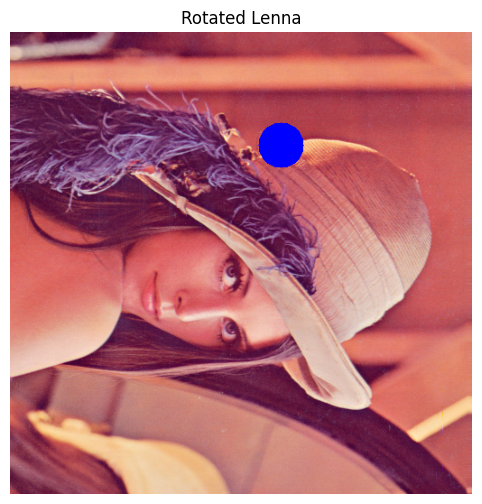

In [211]:
# Rotated Lenna
rotLenna = cv.rotate(lenna,cv.ROTATE_90_CLOCKWISE)
rotLenna = cv.circle(rotLenna,(300,125),25,(0,0,255),-1)
rotTensor = torch.tensor(lenna.transpose(2,1,0)[np.newaxis,...].astype(np.float32).copy()).to(device)
plt.figure(figsize=(9,6))
plt.imshow(rotLenna)
plt.title('Rotated Lenna')
plt.axis('off')
plt.show()

In [212]:
# Registered Lenna
registeredCV = register_images(rotLenna,lenna)
registeredKornia = register_images_kornia(lennaTensor,rotTensor)

AttributeError: module 'kornia' has no attribute 'resize'

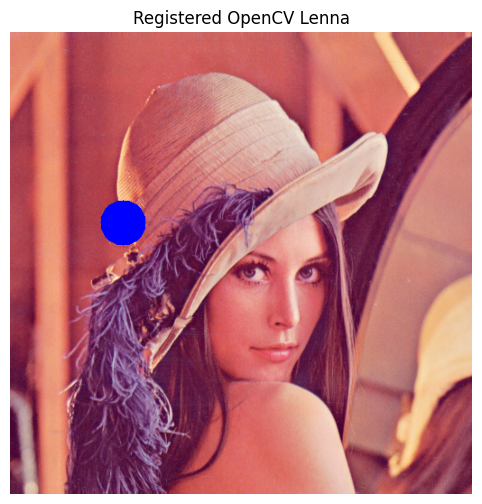

In [200]:
plt.figure(figsize=(9,6))
plt.imshow(registeredCV)
plt.title('Registered OpenCV Lenna')
plt.axis('off')
plt.show()

In [203]:
# Performance Benchmarks
iter = 250

# Blur OpenCV 
print('ImageRegister OpenCV')
start = time.time()
for _ in tqdm(range(iter)):
    registeredCV = register_images(rotLenna,lenna)
end = time.time()
avgBlurCV = (end-start)/iter
print(f'Average OpenCV Runtime: {1000*avgBlurCV:.2f} ms')

ImageRegister OpenCV


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 250/250 [00:02<00:00, 111.97it/s]

Average OpenCV Runtime: 8.94 ms
